In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings(action='ignore')

In [109]:
df=pd.read_csv("0512imputation_data.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)

In [110]:
# Fail_df : df_4['Pass/Fail'] == 1 의 행만 뽑은 데이터
Fail_df = df[df['Pass/Fail'] == 1]
# Pass_df : df_4['Pass/Fail'] == -1 의 행만 뽑은 데이터
Pass_df =df[df['Pass/Fail'] == 0]

# total_df = Fail_df + Pass_df 
# total_df = pd.merge(Fail_df,Pass_df)

In [111]:
list_col = list(df.columns)

list_col.remove('Pass/Fail')

In [112]:
Pass_df

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.003400,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0
1,3095.78,2465.14,-0.014800,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,0
3,2988.72,2479.90,-0.003300,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,0
4,3032.24,2502.87,-0.007200,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,0
5,2946.25,2432.84,0.005500,-0.0002,-0.0001,0.0265,-0.0052,0.0006,-0.0008,0.0004,...,7869.700000,-0.1130,0.0009,-0.0004,-0.0002,0.0001,0.1925,-0.2240,-0.0419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,-0.005700,0.0000,0.0000,-0.0988,-0.0094,-0.0012,-0.0002,-0.0011,...,9201.720100,0.1671,0.0002,0.0011,0.0000,0.0000,-0.0382,0.0730,0.0884,0
1563,3052.31,2522.55,-0.009300,-0.0004,0.0002,0.0855,-0.0116,0.0005,0.0055,-0.0026,...,8624.859900,-0.3570,-0.0055,0.0026,0.0000,0.0001,-0.0821,0.4289,-0.0372,0
1564,2978.81,2379.78,0.000114,-0.0001,-0.0002,0.0022,-0.0142,0.0002,-0.0033,0.0001,...,8992.670200,-0.0223,0.0034,-0.0001,-0.0002,0.0000,0.2516,-0.4311,-0.0177,0
1565,2894.92,2532.01,0.003200,0.0004,0.0000,-0.1165,-0.0087,-0.0019,0.0036,0.0035,...,8824.875719,0.1759,-0.0036,-0.0034,0.0000,0.0001,-0.0926,-0.1023,0.1451,0


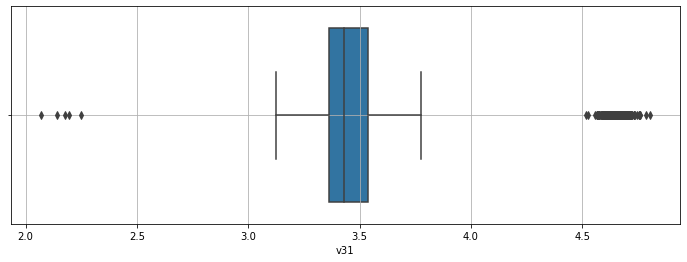

In [113]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['v31'])
plt.grid()
plt.show()

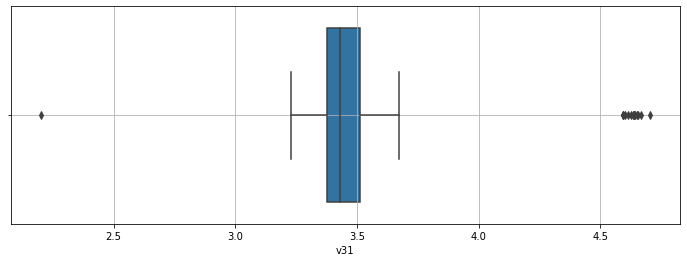

In [114]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(Fail_df['v31'])
plt.grid()
plt.show()

In [115]:
a = Fail_df['v31']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

15

In [116]:
a = Pass_df['v7']
weight = 2.0
quantile_25 = np.percentile(a.values, 25)
quantile_75 = np.percentile(a.values, 75)

iqr = quantile_75 - quantile_25
iqr_weight = iqr * weight
lowest_val = quantile_25 - iqr_weight
highest_val = quantile_75 + iqr_weight

outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)

len(outlier_index)

8

In [117]:
outlier_index

[1446, 1448, 1456, 1459, 1460, 1461, 1467, 1469]

In [118]:
over10percent_result = [] # 아웃라이어의 개수가 15%이상 넘는 피쳐이름과 그 개수 담으려구 만든 리스트
total_cell_number = 0 

In [119]:
import numpy as np

def outlier_change(df, weight_val, over15_li, border_num):
    for i in range(0, len(list(df.columns))):

        a = df[list(df.columns)[i]]
        weight = weight_val
        quantile_25 = np.percentile(a.values, 25)
        quantile_75 = np.percentile(a.values, 75)
        median=np.percentile(a.values, 50)

        iqr = quantile_75 - quantile_25
        iqr_weight = iqr * weight
        lowest_val = quantile_25 - iqr_weight
        highest_val = quantile_75 + iqr_weight

        outlier_index = list(a[(a<lowest_val)|(a>highest_val)].index)
        lowest_index = list(a[(a<lowest_val)].index)
        highest_index= list(a[(a>highest_val)].index)

        # 만약, 아웃라이어 값이 존재한다면
        if(len(outlier_index) != 0) : 

            # (코드 추가) 전체 아웃라이어 개수 셀단위로 몇 개인지 세어보기
            global total_cell_number # 전역변수 변경하는거라 앞에 global 반드시 붙여줘야함
            total_cell_number += len(outlier_index)

            # (코드 추가) 만약 아웃라이어가 15%이상의 비율을 차지할 경우 : border_num
            if(len(outlier_index) >=  border_num): 
                over15_li.append(list(df.columns)[i]) # 피쳐 이름추가
                over15_li.append(len(outlier_index))  # 이어서, 개수 추가
            else:
                for index in range(0, len(lowest_index)):
                    df.loc[[lowest_index[index]],[list(df.columns)[i]]] = median
                
                for  index in range(0, len(highest_index)):
                    df.loc[[ highest_index[index]],[list(df.columns)[i]]] =  median

In [120]:
outlier_change(Pass_df,1.5,over10percent_result,1463*0.01)

In [121]:
over10percent_result

['v0',
 50,
 'v1',
 81,
 'v10',
 30,
 'v100',
 31,
 'v101',
 60,
 'v102',
 58,
 'v103',
 31,
 'v104',
 41,
 'v105',
 78,
 'v106',
 106,
 'v107',
 58,
 'v108',
 40,
 'v112',
 138,
 'v113',
 33,
 'v114',
 19,
 'v115',
 52,
 'v116',
 176,
 'v117',
 73,
 'v118',
 30,
 'v120',
 45,
 'v121',
 24,
 'v122',
 23,
 'v125',
 41,
 'v126',
 43,
 'v127',
 20,
 'v128',
 40,
 'v129',
 224,
 'v133',
 25,
 'v134',
 24,
 'v135',
 59,
 'v138',
 86,
 'v139',
 86,
 'v140',
 54,
 'v142',
 58,
 'v143',
 36,
 'v144',
 116,
 'v145',
 71,
 'v146',
 77,
 'v150',
 50,
 'v151',
 27,
 'v152',
 124,
 'v153',
 16,
 'v155',
 76,
 'v156',
 55,
 'v158',
 19,
 'v159',
 118,
 'v16',
 32,
 'v160',
 60,
 'v161',
 129,
 'v162',
 152,
 'v163',
 49,
 'v164',
 53,
 'v165',
 40,
 'v166',
 50,
 'v167',
 19,
 'v168',
 21,
 'v17',
 21,
 'v171',
 78,
 'v173',
 34,
 'v175',
 30,
 'v177',
 214,
 'v184',
 42,
 'v185',
 41,
 'v19',
 46,
 'v195',
 192,
 'v196',
 61,
 'v197',
 44,
 'v198',
 24,
 'v199',
 161,
 'v2',
 29,
 'v20',
 29,
 'v20

In [122]:
total_cell_number

22720

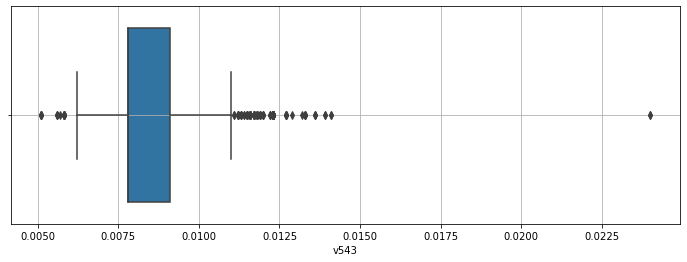

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize=(12,4))
sns.boxplot(Pass_df['v543'])
plt.grid()
plt.show()

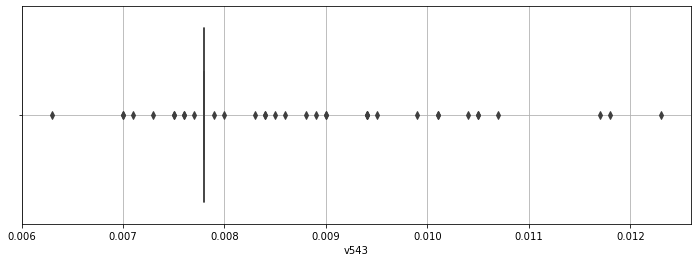

In [124]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(Fail_df['v543'])
plt.grid()
plt.show()

In [125]:
perfect_data = pd.concat([Pass_df,Fail_df], axis = 0)

In [126]:
perfect_data

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v90,v91,v92,v93,v94,v95,v96,v98,v99,Pass/Fail
0,3030.93,2564.00,-0.0034,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0000,...,8671.930100,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.3974,-0.0251,0
1,3095.78,2465.14,-0.0148,-0.0004,-0.0004,-0.0752,-0.0045,0.0002,0.0015,0.0000,...,8407.029900,0.1455,-0.0015,0.0000,-0.0005,0.0001,0.5854,-0.9353,-0.0158,0
3,2988.72,2479.90,-0.0033,-0.0002,0.0000,-0.0699,-0.0059,0.0003,0.0003,0.0021,...,8205.700000,0.0697,-0.0003,-0.0021,-0.0001,0.0002,0.0411,0.0177,-0.0195,0
4,3032.24,2502.87,-0.0072,0.0004,-0.0003,0.0696,-0.0045,0.0002,0.0078,0.0000,...,9014.460000,0.0448,-0.0077,-0.0001,-0.0001,-0.0001,0.2189,-0.6704,-0.0167,0
5,2946.25,2432.84,0.0055,-0.0002,-0.0001,0.0265,-0.0052,0.0006,-0.0008,0.0004,...,7869.700000,-0.1130,0.0009,-0.0004,-0.0002,0.0001,0.1925,-0.2240,-0.0419,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365,2988.39,2493.72,0.0001,0.0002,-0.0002,0.0527,-0.0108,0.0005,-0.0007,-0.0009,...,9166.900100,-0.1869,0.0007,0.0009,-0.0002,0.0001,0.1763,-0.4620,-0.0344,1
1400,3052.98,2515.51,-0.0058,0.0010,-0.0002,-0.0440,-0.0063,0.0005,0.0005,-0.0010,...,8615.350100,0.0116,-0.0005,0.0010,0.0001,0.0001,-0.1473,-0.3505,-0.0400,1
1438,2951.84,2477.13,-0.0039,0.0000,-0.0001,-0.0237,-0.0114,-0.0004,-0.0005,0.0013,...,8862.260100,0.1514,0.0005,-0.0013,-0.0001,0.0001,0.1616,-0.3247,0.0298,1
1443,3173.18,2428.64,-0.0057,0.0003,0.0000,0.0382,-0.0086,-0.0006,-0.0018,0.0019,...,8824.875719,-0.1570,0.0019,-0.0019,0.0000,0.0001,-0.0722,-0.0724,0.0409,1


In [127]:
#perfect_data.to_csv("outlier_finish0609.csv")
perfect_data=pd.read_csv("outlier_finish0609.csv").drop("Unnamed: 0",axis=1)

In [128]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model 
        to generalize and improves the interpretability of the model.

    Inputs: 
        x: features dataframe
        threshold: features with correlations greater than this value are removed

    Output: 
        dataframe that contains only the non-highly-collinear features
    '''

    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i+1):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)

            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                #print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns=drops)

    return x

In [129]:
df_corr = remove_collinear_features(perfect_data,0.7)

In [130]:
df_corr

,v0,v1,v10,v100,v101,v102,v103,v104,v105,v106,...,v83,v84,v86,v88,v89,v9,v90,v91,v95,Pass/Fail
0,3030.93,2564.00,-0.0034,0.0002,0.0002,0.13500,-0.0042,0.0003,0.0056,0.00000,...,7.2163,0.1320,2.3895,1747.6049,0.184100,0.0162,8671.930100,-0.231350,0.0003,0
1,3095.78,2465.14,-0.0148,-0.0004,-0.0004,-0.07520,-0.0045,0.0002,0.0015,0.00000,...,6.8043,0.1358,2.3754,1931.6464,0.187400,-0.0005,8407.029900,0.145500,0.0001,0
2,2988.72,2479.90,-0.0033,-0.0002,0.0000,-0.06990,-0.0059,0.0003,0.0003,0.00210,...,7.5925,0.1302,2.4004,1752.0968,0.195800,-0.0124,8205.700000,0.069700,0.0002,0
3,3032.24,2502.87,-0.0072,0.0004,-0.0003,0.06960,-0.0045,0.0002,0.0071,0.00000,...,7.5017,0.1342,2.4530,1828.3846,0.182900,-0.0031,9014.460000,0.044800,-0.0001,0
4,2946.25,2432.84,0.0055,-0.0002,-0.0001,0.02650,-0.0052,0.0006,-0.0008,0.00040,...,6.7509,0.1417,2.3745,1832.6305,0.209900,0.0167,7869.700000,-0.113000,0.0001,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2988.39,2493.72,0.0001,0.0002,-0.0002,0.05270,-0.0108,0.0005,-0.0007,-0.00090,...,6.7942,0.1281,2.3632,1698.8110,0.182400,-0.0094,9166.900100,-0.174275,0.0001,1
1563,3052.98,2515.51,-0.0058,0.0010,-0.0002,-0.04400,-0.0063,0.0005,0.0005,-0.00100,...,7.3625,0.1300,2.4494,1874.6711,0.212500,-0.0037,8615.350100,0.011600,0.0001,1
1564,2951.84,2477.13,-0.0039,0.0000,-0.0001,-0.02370,-0.0114,-0.0004,-0.0005,0.00130,...,7.9018,0.1347,2.4146,1955.8828,0.171800,-0.0027,8862.260100,0.151400,0.0001,1
1565,3173.18,2428.64,-0.0057,0.0003,0.0000,0.03820,-0.0086,-0.0006,-0.0018,0.00190,...,6.5761,0.1324,2.4456,1723.7672,0.186269,-0.0278,8824.875719,-0.157000,0.0001,1


In [131]:
data, target = df_corr.drop('Pass/Fail', axis=1).values, df_corr['Pass/Fail'].values

In [132]:
X, y = df_corr.drop('Pass/Fail', axis=1), df_corr['Pass/Fail']

### feature selection

In [133]:
import sklearn_relief as relief
from sklearn.feature_selection import SelectKBest
fs = relief.Relief(n_features=200,random_state=1,n_jobs=8)
X_new=fs.fit_transform(data, target)

In [134]:
X1=pd.DataFrame(X_new)
y1=pd.DataFrame(target)

In [135]:
y1.rename(columns={0:'Pass/Fail'},inplace=True)

In [136]:
df_corr_rlf=pd.concat([X1,y1],axis=1)

In [137]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# 미리 사용할 알고리즘을 fit 해야한다
model =RandomForestClassifier(n_estimators =100,random_state=12).fit(X1, y1)
perm = PermutationImportance(model, scoring = "f1", random_state = 12).fit(X1, y1) 
#eli5.show_weights(perm, top = 70, feature_names = X1.columns.tolist())

In [138]:
temp=eli5.explain_weights_df(perm)
temp.head(40)

,feature,weight,std
0,x48,0.105256,0.002482
1,x47,0.100605,0.004089
2,x39,0.056050,0.004855
3,x157,0.037727,0.002871
4,x173,0.036595,0.003701
5,x119,0.013649,0.001970
6,x45,0.012570,0.003811
7,x102,0.009709,0.000000
8,x171,0.009709,0.000000
9,x58,0.009709,0.000000


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

#X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2, random_state = 12, stratify = y)
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100),threshold=0.0055)
sel.fit(X1, y1)
selected_feat= X1.columns[(sel.get_support())]
df_final_2 = pd.concat([df_corr_rlf[selected_feat],df_corr_rlf['Pass/Fail']],axis= 1)
y2 = df_final_2['Pass/Fail']
X2 = df_final_2.drop('Pass/Fail',axis=1)

In [139]:
important_cols_p=temp[temp['weight']>0]['feature'].map(lambda x: int(x.replace('x', ''))).values
important_cols_p


important_cols_p=X1.columns[important_cols_p].values

In [140]:
df_final_2 = pd.concat([df_corr_rlf[important_cols_p],df_corr_rlf['Pass/Fail']],axis= 1)
y2 = df_final_2['Pass/Fail']
X2 = df_final_2.drop('Pass/Fail',axis=1)

In [141]:
X2

,48,47,39,157,173,119,45,102,171,58,...,193,135,84,55,46,191,72,167,18,96
0,-1.72640,63.9400,64.670700,0.077200,-0.05665,0.9226,29.939400,0.47340,0.0599,21.7264,...,0.5005,0.141169,3.4789,16.1445,46.2000,0.9484,39.2373,-0.00830,0.0000,86.9555
1,0.80730,78.2500,118.770450,0.056600,-0.03770,1.1598,40.447500,0.56660,0.0488,19.1927,...,0.5019,0.148388,3.9578,10.9036,56.2000,0.9479,37.9213,-0.03580,0.0000,87.5241
2,15.59685,76.9000,113.559300,0.124800,0.00280,0.9761,27.682400,1.23405,0.0463,15.6209,...,0.4990,0.163000,5.5398,13.5597,47.8000,0.9447,41.1025,0.05785,336.7660,86.6867
3,-12.29450,76.3900,118.770450,0.091500,-0.01230,0.9256,30.892400,0.44340,0.0506,32.2945,...,0.4891,0.142628,4.1338,21.9782,48.8000,0.9449,38.1448,0.00340,0.0000,86.1468
4,15.59685,63.9400,68.735100,0.064500,-0.01110,0.9227,42.826100,0.55640,0.0391,11.7045,...,0.4949,0.190500,2.8799,7.6180,48.8000,0.9433,37.9213,-0.00260,273.8095,87.0273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-1.21640,80.7900,45.581400,0.088400,-0.02270,0.8139,19.977300,0.44660,0.0664,21.2164,...,0.4972,0.347050,6.9396,12.5907,58.0000,0.9509,33.3658,0.00930,242.0690,86.7475
1563,-2.49000,80.0100,68.800000,0.233325,-0.01300,0.8314,21.685700,0.15440,0.0581,22.4900,...,0.5081,0.087700,4.5112,12.1018,51.7998,0.9458,36.0220,-0.03310,752.1127,86.5543
1564,-5.16450,79.8000,38.512000,0.065000,-0.00740,0.8440,22.596400,0.45270,0.0285,25.1645,...,0.4969,0.225600,2.5172,14.3600,62.1001,0.9463,37.0354,0.00590,0.0000,86.8309
1565,-6.24730,36.3425,36.994200,0.074600,-0.01520,0.5229,25.075200,0.30530,0.0473,26.2473,...,0.5021,0.281100,3.6908,20.0673,48.9001,0.9463,39.8795,-0.00310,74.9074,86.8342


In [142]:
unique_vals = df_final_2['Pass/Fail'].unique()  # [0, 1, 2]
targets = [df_final_2.loc[df_final_2['Pass/Fail'] == val] for val in unique_vals]

No handles with labels found to put in legend.


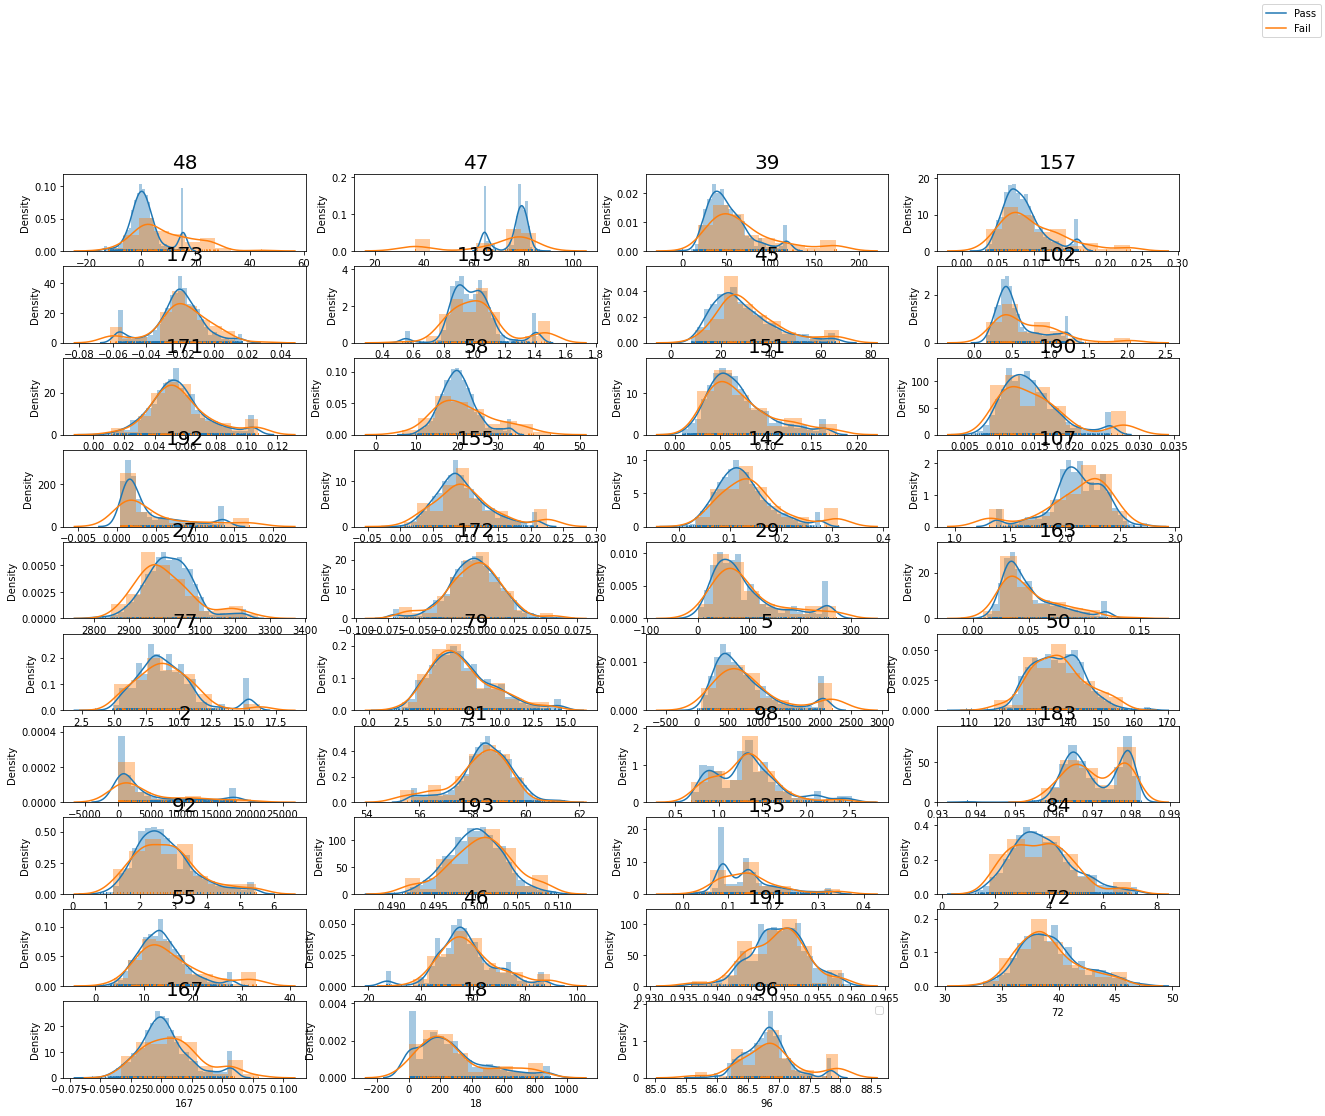

In [173]:
box_feature = df_final_2.columns
fig = plt.figure(figsize=(20,20))
lists=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
for i,j in zip(box_feature,lists):
    plt.subplot(12, 4, j)
    for target in targets:
        sns.distplot(target[i], hist=True, rug=True)
        plt.title(i, fontsize = 20)


#sns.add_legend()
plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
column=X2.columns
fig = plt.figure(figsize=(20,20))

for i in column:
    plt.subplots(nrows=1, ncols=1, figsize=(8, 4), squeeze=False)
    for target in targets:
        sns.boxplot(x="Pass/Fail", y=target[i], data=df_final_2)
        plt.title(i, fontsize = 10)


#sns.add_legend()
plt.legend()
fig.legend(labels=['Pass','Fail'])
plt.show()

In [145]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_validate

In [164]:
#f-1 score::0.4305
#accuracy:0.9292
#recall :0.3755
#precision:0.7954
#roc_auc: 0.845
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
imba_pipeline = make_pipeline(SMOTE(random_state=10,sampling_strategy=0.7), 
                              RandomForestClassifier(random_state=1))
score=cross_val_score(imba_pipeline, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))

교차 검증별 f-1: [0.8837 0.8476 0.948  0.9524 0.9689 0.8014 0.8434 0.7123 0.6733 0.8192]
평균 검증 f-1: 0.845


In [168]:
#f-1 score:0.4703
#accuracy:0.9369
#recall:0.4145
#precision:0.8064
#roc_auc:0.8474
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN # doctest: +NORMALIZE_WHITESPACE
imba_pipeline1 = make_pipeline(ADASYN(random_state=10,sampling_strategy=0.7),RandomForestClassifier(random_state=1))
score=cross_val_score(imba_pipeline1, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))

교차 검증별 f-1: [0.8901 0.8803 0.9347 0.9318 0.986  0.7998 0.8689 0.6658 0.7233 0.7928]
평균 검증 f-1: 0.8474


In [175]:
#f-1 score:0.334
#accuracy:0.8533
#recall:0.5191
#precision:0.2952
#roc_auc:0.6981
from sklearn.tree import DecisionTreeClassifier
imba_pipeline = make_pipeline(ADASYN(random_state=10,sampling_strategy=0.7), 
                             DecisionTreeClassifier(random_state=100))
score=cross_val_score(imba_pipeline, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))

교차 검증별 f-1: [0.6503 0.681  0.8024 0.7874 0.8646 0.6441 0.6021 0.6158 0.6918 0.6418]
평균 검증 f-1: 0.6981


In [179]:
#f-1:0.3479
#ac:0.8438
#re:0.5473
#precision:0.2889
#roc_auc:0.7061
from sklearn.tree import DecisionTreeClassifier
imba_pipeline = make_pipeline(SMOTE(random_state=42,sampling_strategy=0.7), 
                             DecisionTreeClassifier(random_state=10))
score=cross_val_score(imba_pipeline, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))

교차 검증별 f-1: [0.6027 0.7037 0.8116 0.7385 0.8646 0.7702 0.5918 0.6397 0.6158 0.7226]
평균 검증 f-1: 0.7061


In [183]:
#f-1 :0.2987
#ac:0.796
#recall:0.5518
#precision:0.2412
#roc_auc:0.6788
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
imba_pipeline2 = make_pipeline(RobustScaler(),SMOTE(random_state=42,sampling_strategy=0.7), 
                             LogisticRegression(random_state=10))
score=cross_val_score(imba_pipeline2, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))


교차 검증별 f-1: [0.8653 0.6871 0.8041 0.8032 0.8917 0.5473 0.6034 0.4863 0.5226 0.5767]
평균 검증 f-1: 0.6788


In [197]:
#f-1 :0.2632
#ac:0.796
#recall:0.5309
#precision:0.2119
#roc_auc:0.6908
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
imba_pipeline2 = make_pipeline(RobustScaler(),ADASYN(random_state=42,sampling_strategy=0.7), 
                             LogisticRegression(random_state=10))
score=cross_val_score(imba_pipeline2, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))

교차 검증별 f-1: [0.8231 0.6694 0.8299 0.7989 0.9022 0.6065 0.6339 0.513  0.574  0.5568]
평균 검증 f-1: 0.6908


In [187]:
#f-1 :0.4972
#ac:0.9197
#recall:0.57
#pre:0.6282
#roc_auc:0.8368
from sklearn.ensemble import GradientBoostingClassifier
imba_pipeline2 = make_pipeline(SMOTE(random_state=1,sampling_strategy=0.7), 
                             GradientBoostingClassifier(random_state=10))
score=cross_val_score(imba_pipeline2, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))



교차 검증별 f-1: [0.9626 0.9347 0.9313 0.9601 0.9564 0.8113 0.7186 0.7308 0.6493 0.713 ]
평균 검증 f-1: 0.8368


In [191]:
#f-1 :0.4667
#ac:0.9235
#recall:0.5227
#precision:0.6258
#roc_auc:0.8337
from sklearn.ensemble import GradientBoostingClassifier
imba_pipeline2 = make_pipeline(ADASYN(random_state=1,sampling_strategy=0.7), 
                             GradientBoostingClassifier(random_state=10))
score=cross_val_score(imba_pipeline2, X2, y2, scoring='roc_auc', cv=10)
print('교차 검증별 f-1:', np.round(score, 4))
print('평균 검증 f-1:', np.round(np.mean(score), 4))



교차 검증별 f-1: [0.9626 0.9224 0.9211 0.9633 0.967  0.7447 0.7889 0.6568 0.676  0.7342]
평균 검증 f-1: 0.8337
